In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [2]:
from sklearn.linear_model import LinearRegression, Lasso #l2 regularization
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [4]:
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
data.shape

(301, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


EDA
1. Explore missing vals
2. Explore numeric and categorical attributes
3. Using Linear Regression, we'll check for independence, linearity, normality of data 

In [8]:
data.isnull().sum().sum()

0

In [9]:
num_cols = [each for each in data.columns if data[each].dtypes != 'object']
print(num_cols)

cat_cols = [each for each in data.columns if data[each].dtypes == 'object']
cat_cols

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']


['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [10]:
#numeric values distinct value count
for each in num_cols:
    print(f"{each} :--> {len(data[each].unique())}")

Year :--> 16
Selling_Price :--> 156
Present_Price :--> 147
Kms_Driven :--> 206
Owner :--> 3


In [11]:
#categoric values distinct value count
for each in cat_cols:
    print(f"{each} :--> {len(data[each].unique())}")

Car_Name :--> 98
Fuel_Type :--> 3
Seller_Type :--> 2
Transmission :--> 2


we have some cat cols with few distinct vals, we will convert those to numeric data.

In [12]:
cat_cols2 = [each for each in cat_cols if each !='Car_Name']

#categorical data coversion
for each in cat_cols2:
    orderedIndex = data.groupby(each)['Selling_Price'].mean().sort_values().index
    count = data.groupby(each)['Selling_Price'].mean().count()
    print(orderedIndex, count, '/n')
    
    cat_num ={j:i for i, j in enumerate(orderedIndex, 0)}
    data[each] = data[each].map(cat_num)
    
    
data.head()

Index(['CNG', 'Petrol', 'Diesel'], dtype='object', name='Fuel_Type') 3 /n
Index(['Individual', 'Dealer'], dtype='object', name='Seller_Type') 2 /n
Index(['Manual', 'Automatic'], dtype='object', name='Transmission') 2 /n


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,0,0
1,sx4,2013,4.75,9.54,43000,2,1,0,0
2,ciaz,2017,7.25,9.85,6900,1,1,0,0
3,wagon r,2011,2.85,4.15,5200,1,1,0,0
4,swift,2014,4.60,6.87,42450,2,1,0,0


In [13]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,1.192691,0.647841,0.132890,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.411598,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,1.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,1.000000,1.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,1.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


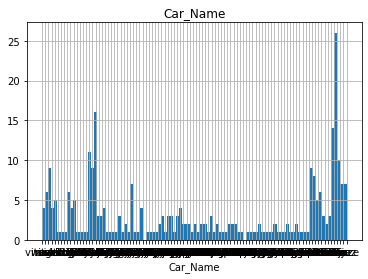

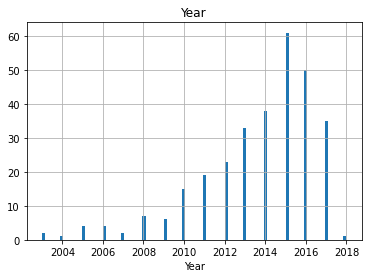

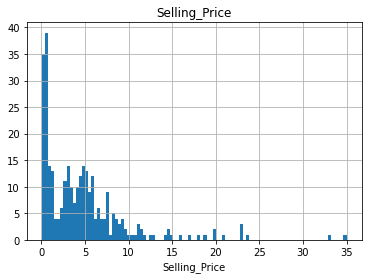

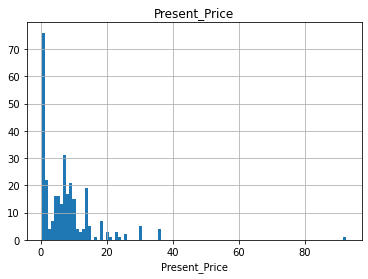

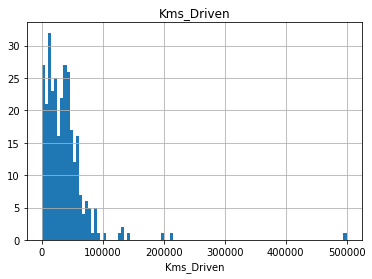

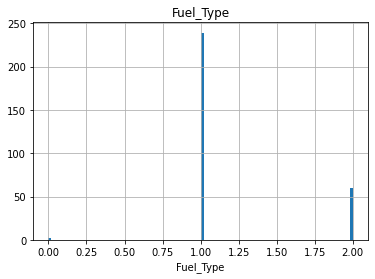

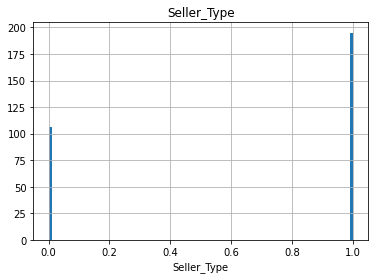

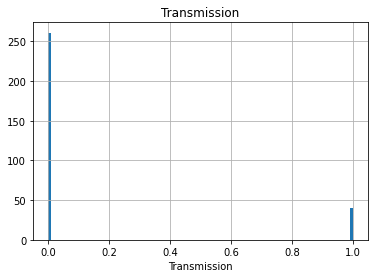

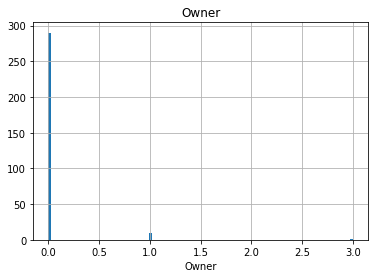

In [14]:
for each in data.columns:
    data[each].hist(bins =100)
    plt.xlabel(each)
    plt.title(each)
    plt.show()

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']


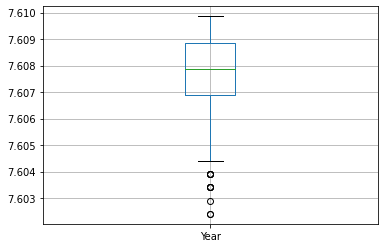

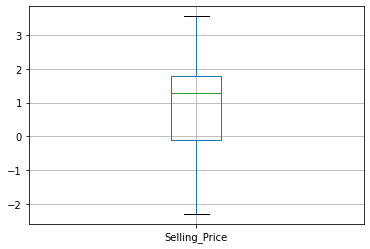

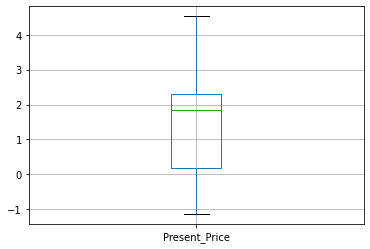

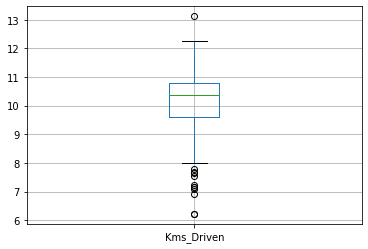

In [18]:
#lets check for outliers

# get_attributes with continuous featuers
continuous = [each for each in data.columns if each not in cat_cols2 and each != "Car_Name"]
print(continuous)

for each in continuous[:-1]: #owner attribute has 3 distinct values
    tempdf = data.copy()
    tempdf[each] = np.log(tempdf[each])
    tempdf.boxplot(column = each)
    plt.show()

we see quite a number of outliers in our continuous attributes, and this could affect our models performance, we will rely on regularization techniques.

In [19]:
data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,0.066046,0.039896,-0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.541973,0.550724,0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.462434,0.512030,0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.165307,0.101419,0.162510,0.089216
Fuel_Type,0.066046,0.541973,0.462434,0.165307,1.000000,0.328810,0.102234,-0.049163
Seller_Type,0.039896,0.550724,0.512030,0.101419,0.328810,1.000000,0.063240,-0.124269
Transmission,-0.000394,0.367128,0.348715,0.162510,0.102234,0.063240,1.000000,0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.049163,-0.124269,0.050316,1.000000


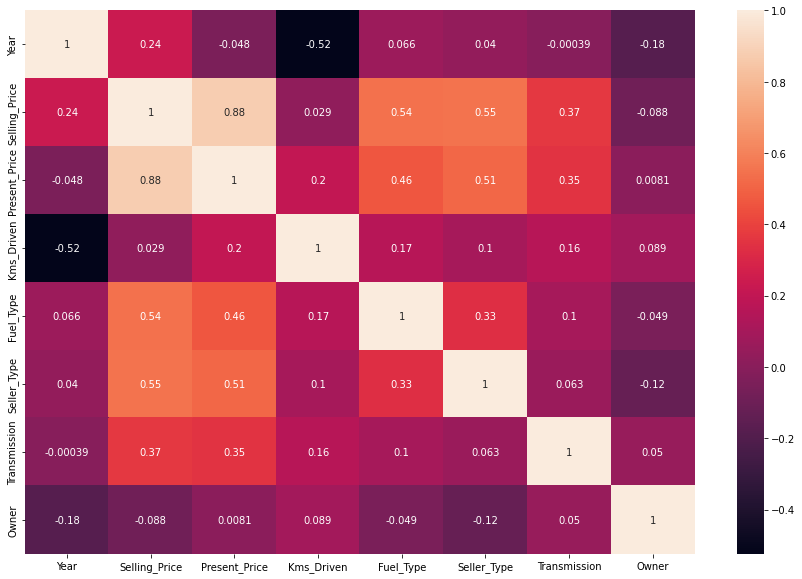

In [20]:
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(),annot = True)
plt.show()

from this we can establish the individuality of our attributes, 

In [21]:
x = data.corr()['Selling_Price'].sort_values(ascending = False)
x

Selling_Price    1.000000
Present_Price    0.878983
Seller_Type      0.550724
Fuel_Type        0.541973
Transmission     0.367128
Year             0.236141
Kms_Driven       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

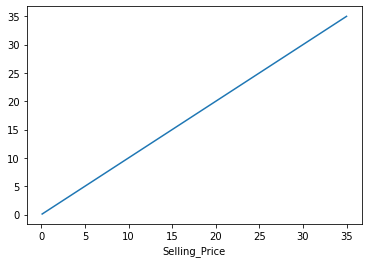

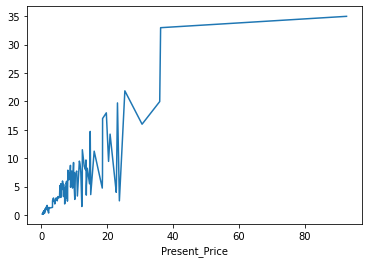

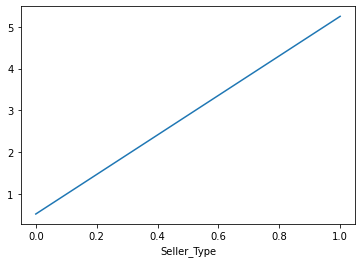

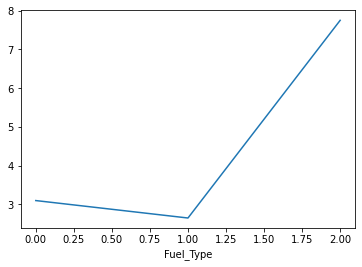

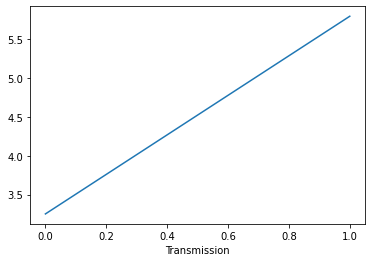

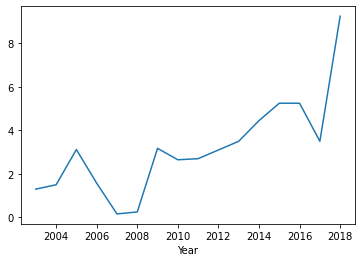

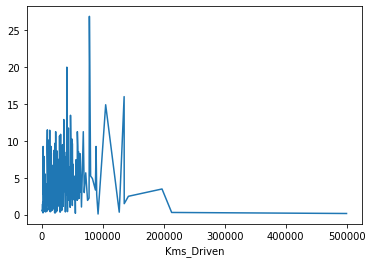

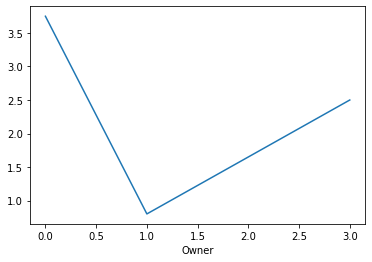

In [22]:
for each in x.index:
    data.groupby(each)['Selling_Price'].median().plot()
    plt.show()

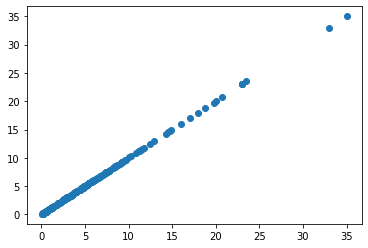

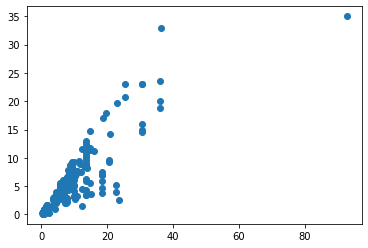

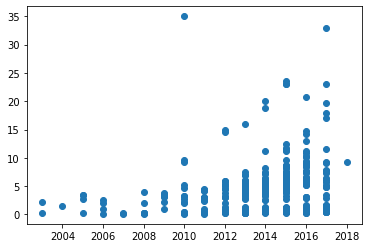

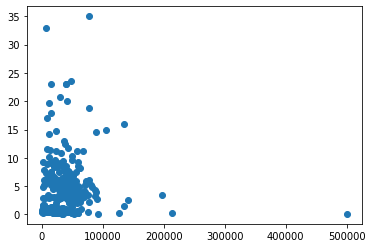

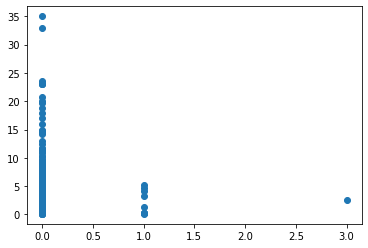

In [23]:
for each in x.index:
    if each in continuous:
        plt.scatter(data[each], data['Selling_Price'])
    else:
        pass
#     data.groupby(each)['Selling_Price'].median().plot()
    plt.show()

Linearity with some attributes appear to be a tricky one.

In [24]:
X = data.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = data['Selling_Price']


In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [26]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((240, 7), (240,), (61, 7), (61,))

Model Training and Building

In [27]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [28]:
lr_predtrain = lr.predict(x_train)
print(lr_predtrain[:10])
print(y_train[:10])

[-2.36127987  1.95733529 -1.57770183  4.78692433  1.8088176  20.28792391
 18.34566685  5.45848206 -0.66649518  4.9875268 ]
184     0.25
132     0.75
194     0.20
75      3.95
111     1.15
59     19.99
93     23.00
6       6.75
175     0.38
30      3.10
Name: Selling_Price, dtype: float64


In [29]:
#lets chekc with our metrics
r2error = metrics.r2_score(y_train, lr_predtrain)
mae = metrics.mean_absolute_error(y_train, lr_predtrain)
mse = metrics.mean_squared_error(y_train, lr_predtrain)
rmse = np.sqrt(mse)

print(f'R squared error is {r2error}\nRoot mean squared error is {rmse}\nmean squared error is {mse}\n Mean absolute error {mae}')

R squared error is 0.8883403303195581
Root mean squared error is 1.7181248595894354
mean squared error is 2.9519530331392168
 Mean absolute error 1.1725148307646747


 This looks too good to be true; despite the likelihood of it being right . lets confirm with a grapic of predictions

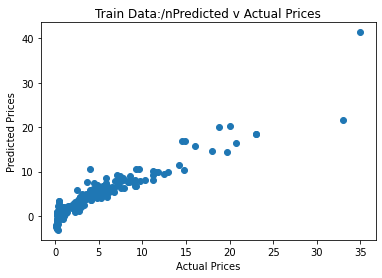

In [30]:
plt.scatter(y_train, lr_predtrain)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Train Data:/nPredicted v Actual Prices")
plt.show()

Our Points seem to be close enough to each other, lets see how it generalizes on the test data

In [31]:
lr_testPred = lr.predict(x_test)
print(lr_testPred[:10])
print(y_test[:10])

[ 2.9455812   8.21752417  6.40766634 -1.43122955  9.1370409   7.36892014
  1.33789245  0.83845412  1.3638191   7.44240215]
177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
9       7.45
118     1.10
154     0.50
164     0.45
33      6.00
Name: Selling_Price, dtype: float64


In [32]:
r2error = metrics.r2_score(y_test, lr_testPred)
mae = metrics.mean_absolute_error(y_test, lr_testPred)
mse = metrics.mean_squared_error(y_test, lr_testPred)
rmse = np.sqrt(mse)

print(f'R squared error is {r2error}\nRoot mean squared error is {rmse}\nmean squared error is {mse}\n Mean absolute error {mae}')

R squared error is 0.8481272601751251
Root mean squared error is 1.8704216996613239
mean squared error is 3.4984773345639555
 Mean absolute error 1.220536359370855


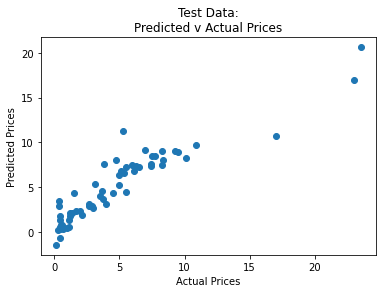

In [33]:
plt.scatter(y_test, lr_testPred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Test Data:\nPredicted v Actual Prices")
plt.show()

Notice the slight variation between our predictions and our actual values

### Lasso Regression; 
a regularization technique

In [34]:
lasso_model  =  Lasso()
lasso_model.fit(x_train, y_train)

Lasso()

In [35]:
lm_pred = lasso_model.predict(x_train)


In [36]:
print(lm_pred[:10])
print(y_train[:10])

[-0.31361109  2.47109527 -0.43940576  4.66761285  2.43480905 19.10109659
 16.68465222  5.43874627  0.25942974  3.31060242]
184     0.25
132     0.75
194     0.20
75      3.95
111     1.15
59     19.99
93     23.00
6       6.75
175     0.38
30      3.10
Name: Selling_Price, dtype: float64


In [37]:
r2error = metrics.r2_score(y_train, lm_pred)
mae = metrics.mean_absolute_error(y_train, lm_pred)
mse = metrics.mean_squared_error(y_train, lm_pred)
rmse = np.sqrt(mse)

print(f'R squared error is {r2error}\nRoot mean squared error is {rmse}\nmean squared error is {mse}\n Mean absolute error {mae}')

R squared error is 0.8480302868137157
Root mean squared error is 2.0044031391382644
mean squared error is 4.017631944187328
 Mean absolute error 1.2231110358007196


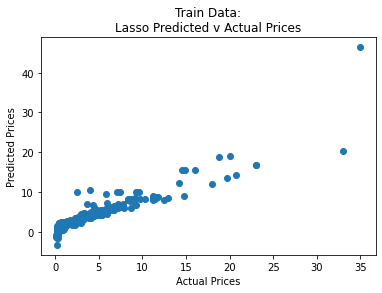

In [38]:
plt.scatter(y_train, lm_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Train Data:\nLasso Predicted v Actual Prices")
plt.show()

In [39]:
#notice how compact we have our graphics rendered.

In [40]:
lm_pred2 = lasso_model.predict(x_test)

In [41]:
r2error = metrics.r2_score(y_test, lm_pred2)
mae = metrics.mean_absolute_error(y_test, lm_pred2)
mse = metrics.mean_squared_error(y_test, lm_pred2)
rmse = np.sqrt(mse)

print(f'''R squared error is {r2error}
Root mean squared error is {rmse}
mean squared error is {mse}
Mean absolute error {mae}
''')

R squared error is 0.798551246128469
Root mean squared error is 2.1541796109690576
mean squared error is 4.640489796314801
Mean absolute error 1.4714288636691477



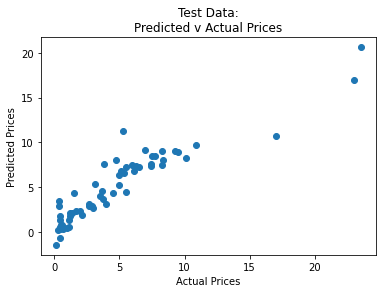

In [42]:
plt.scatter(y_test, lr_testPred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Test Data:\nPredicted v Actual Prices")
plt.show()